<a href="https://www.kaggle.com/code/divyanshukunwar/cyber-crimes?scriptVersionId=116392688" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geojson-for-indian-states/states_india.geojson
/kaggle/input/cyber-crime-in-india-stateut-wise/2014-2017.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/2002-2013.csv
/kaggle/input/cyber-crime-in-india-stateut-wise/2018-2020.csv
/kaggle/input/india-gis-data/India States/Indian_states.shp
/kaggle/input/india-gis-data/India States/Indian_states.prj
/kaggle/input/india-gis-data/India States/Indian_states.dbf
/kaggle/input/india-gis-data/India States/Indian_states.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.dbf
/kaggle/input/india-gis-data/India Boundary/India_boundary.prj
/kaggle/input/india-gis-data/India Boundary/India_boundary.shx
/kaggle/input/india-gis-data/India Boundary/India_boundary.shp


## Data Prprocessing \[For Practise Only\]

Since we have three files with little variation in the data we need to clean the data however a clean dataset is already provided in 
> /kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv

1. Calculate the total value and rename the columns of year 2002-2004 .
2. Rename the value of states as well wherever required
3. Reset the index 
4. Repeat the process for other states as well 
5. Join the dataFrame in one

In [2]:
# Read the data from 2002-2013
df = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2002-2013.csv")
df.head()

,State/UT,2002 IT Act,2002 IPC Section,2003 IT Act,2003 IPC Section,2004 IT Act,2004 IPC Section,2005 IT Act,2005 IPC Section,2006 IT Act,...,2009 IT Act,2009 IPC Section,2010 IT Act,2010 IPC Section,2011 IT Act,2011 IPC Section,2012 IT Act,2012 IPC Section,2013 IT Act,2013 IPC Section
0,ANDHRA PRADESH,8,253,3,218,8,93,14,68,14,...,30,8,105,66,349,23,635,16,635,16
1,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,1,0,3,0,13,1,10,0,10,0
2,ASSAM,2,0,0,0,0,0,1,0,1,...,2,2,18,0,31,0,154,0,154,0
3,BIHAR,0,0,0,0,0,0,0,0,0,...,0,0,2,0,25,13,23,116,23,116
4,CHHATTISGARH,0,0,0,0,0,0,18,28,0,...,4,46,4,46,2,76,91,10,91,10


In [3]:
# There are  two categories under which case is registered namely IT and IPC.
#s Sum of these two columns in a new column will give total cases in the year.
for i in range(2002 , 2014):
    df[str(i)] = df[str(i)+" IT Act"] + df[str(i)+" IPC Section"]
    df.drop(columns=[str(i)+" IT Act", str(i)+" IPC Section"] , inplace=True)

# The name of the states has been modified refer to geojson data to get the name in accordance to geojson file
# Replace withh the new name of the state to match consistency
df['State/UT'] = df['State/UT'].replace(['ORISSA', 'UTTARANCHAL', 'PONDICHERRY'] , ['ODISHA' ,'UTTARAKHAND', 'PUDUCHERRY'])
df.set_index("State/UT" , inplace=True)
df.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,
ANDHRA PRADESH,261,221,101,82,82,69,103,38,171,372,651,651
ARUNACHAL PRADESH,0,0,0,0,0,0,0,1,3,14,10,10
ASSAM,2,0,0,1,1,0,2,4,18,31,154,154
BIHAR,0,0,0,0,0,0,0,0,2,38,139,139
CHHATTISGARH,0,0,0,46,28,57,20,50,50,78,101,101


In [4]:
# Load the data from 2014-2017 
otherdf = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2014-2017.csv")
otherdf.head()

,State/UT,2014 Total,2015 Total,2016 Total,2017 Total
0,Andhra Pradesh,282,536,616,931
1,Arunachal Pradesh,18,6,4,1
2,Assam,379,483,696,1120
3,Bihar,114,242,309,433
4,Chhattisgarh,123,103,90,171


In [5]:

# Rename the columns and state name to match the name to the dataframe 'df'
otherdf.rename(columns={"2014 Total":"2014" , "2015 Total": "2015" , "2016 Total":"2016" , "2017 Total":"2017"} , inplace=True)
otherdf['State/UT'] = otherdf['State/UT'].apply(lambda a : str.upper(a))
otherdf['State/UT']=otherdf['State/UT'].replace(['DELHI UT','D&N HAVELI'] , ['DELHI' , 'D & N HAVELI'])
otherdf = otherdf.set_index("State/UT")
# join df and otherdf (i.e data from 2014-2017)
df = otherdf.join(df)

df.head()

,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,
ANDHRA PRADESH,282,536,616,931,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,18,6,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,379,483,696,1120,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,114,242,309,433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,123,103,90,171,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0


In [6]:
# Load the data from 2017-2020
thirddf = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/2018-2020.csv")
thirddf['State/UT'] = thirddf['State/UT'].apply(lambda a : str.upper(a))
thirddf['State/UT'] = thirddf['State/UT'].replace(['A&N ISLANDS' , 'D&N HAVELI AND'] , ['A & N ISLANDS' , 'D & N HAVELI'])
thirddf = thirddf.set_index("State/UT")
thirddf.head()

,2018,2019,2020
State/UT,,,
ANDHRA PRADESH,1207,1886,1899
ARUNACHAL PRADESH,7,8,30
ASSAM,2022,2231,3530
BIHAR,374,1050,1512
CHHATTISGARH,139,175,297


In [7]:
# join with df 
df = thirddf.join(df)

# write the data to csv file if needed
df.to_csv("CompleteData.csv")
df.head()

,2018,2019,2020,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1207,1886,1899,282.0,536.0,616.0,931.0,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,7,8,30,18.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,2022,2231,3530,379.0,483.0,696.0,1120.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,374,1050,1512,114.0,242.0,309.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,139,175,297,123.0,103.0,90.0,171.0,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0


In [8]:
# we can also read from /kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv
# df = pd.read_csv("/kaggle/input/cyber-crime-in-india-stateut-wise/_CleanedData2002-2020.csv")

# fill empty columns with 0 
df = df.fillna(0)
df.head(35)

,2018,2019,2020,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1207,1886,1899,282.0,536.0,616.0,931.0,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,7,8,30,18.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,2022,2231,3530,379.0,483.0,696.0,1120.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,374,1050,1512,114.0,242.0,309.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,139,175,297,123.0,103.0,90.0,171.0,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0
GOA,29,15,40,62.0,17.0,31.0,13.0,8.0,2.0,0.0,0.0,0.0,4.0,6.0,12.0,16.0,18.0,58.0,58.0
GUJARAT,702,784,1283,227.0,242.0,362.0,458.0,250.0,29.0,126.0,155.0,158.0,3.0,33.0,36.0,55.0,67.0,77.0,77.0
HARYANA,418,564,656,151.0,224.0,401.0,504.0,2.0,1.0,0.0,9.0,2.0,1.0,0.0,0.0,1.0,45.0,323.0,323.0
HIMACHAL PRADESH,69,76,98,38.0,50.0,31.0,56.0,99.0,87.0,0.0,0.0,0.0,0.0,6.0,6.0,17.0,12.0,28.0,28.0


## GeoPandas
GeoPandas, as the name suggests, extends the popular data science library pandas by adding support for geospatial data.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame` , a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations. The `geopandas.GeoSeries`, a subclass of `pandas.Series`, handles the geometries. Therefore, your GeoDataFrame is a combination of pandas.Series, with traditional data (numerical, boolean, text etc.), and `geopandas.GeoSeries`, with geometries (points, polygons etc.).

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [10]:
# read geojson files of india 
gdf = gpd.read_file('/kaggle/input/geojson-for-indian-states/states_india.geojson')
# change all the state and UTs name to uppercase
gdf['st_nm'] = gdf['st_nm'].apply(lambda a : str.upper(a))
gdf.head()

,cartodb_id,state_code,st_nm,geometry
0,1,0,TELENGANA,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,ANDAMAN AND NICOBAR,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,ANDHRA PRADESH,"MULTIPOLYGON (((81.39375 16.33381, 81.39224 16..."
3,4,12,ARUNACHAL PRADESH,"MULTIPOLYGON (((96.16261 29.38078, 96.16860 29..."
4,5,18,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."


In [11]:
df = df.reset_index()
# rename the names to match the name in geojson file
df['State/UT'] = df['State/UT'].replace(['TELANGANA','A & N ISLANDS','JAMMU & KASHMIR','D & N HAVELI']
,['TELENGANA','ANDAMAN AND NICOBAR','JAMMU AND KASHMIR' , 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'])
# set state as index again
df.set_index("State/UT" , inplace=True)
df[df.index=='JAMMU AND KASHMIR'] = df[df.index=='JAMMU AND KASHMIR'].values+ df[df.index=='LADAKH '].values

In [12]:
gdf = gdf.set_index('st_nm')
gdf = gdf.join(df)

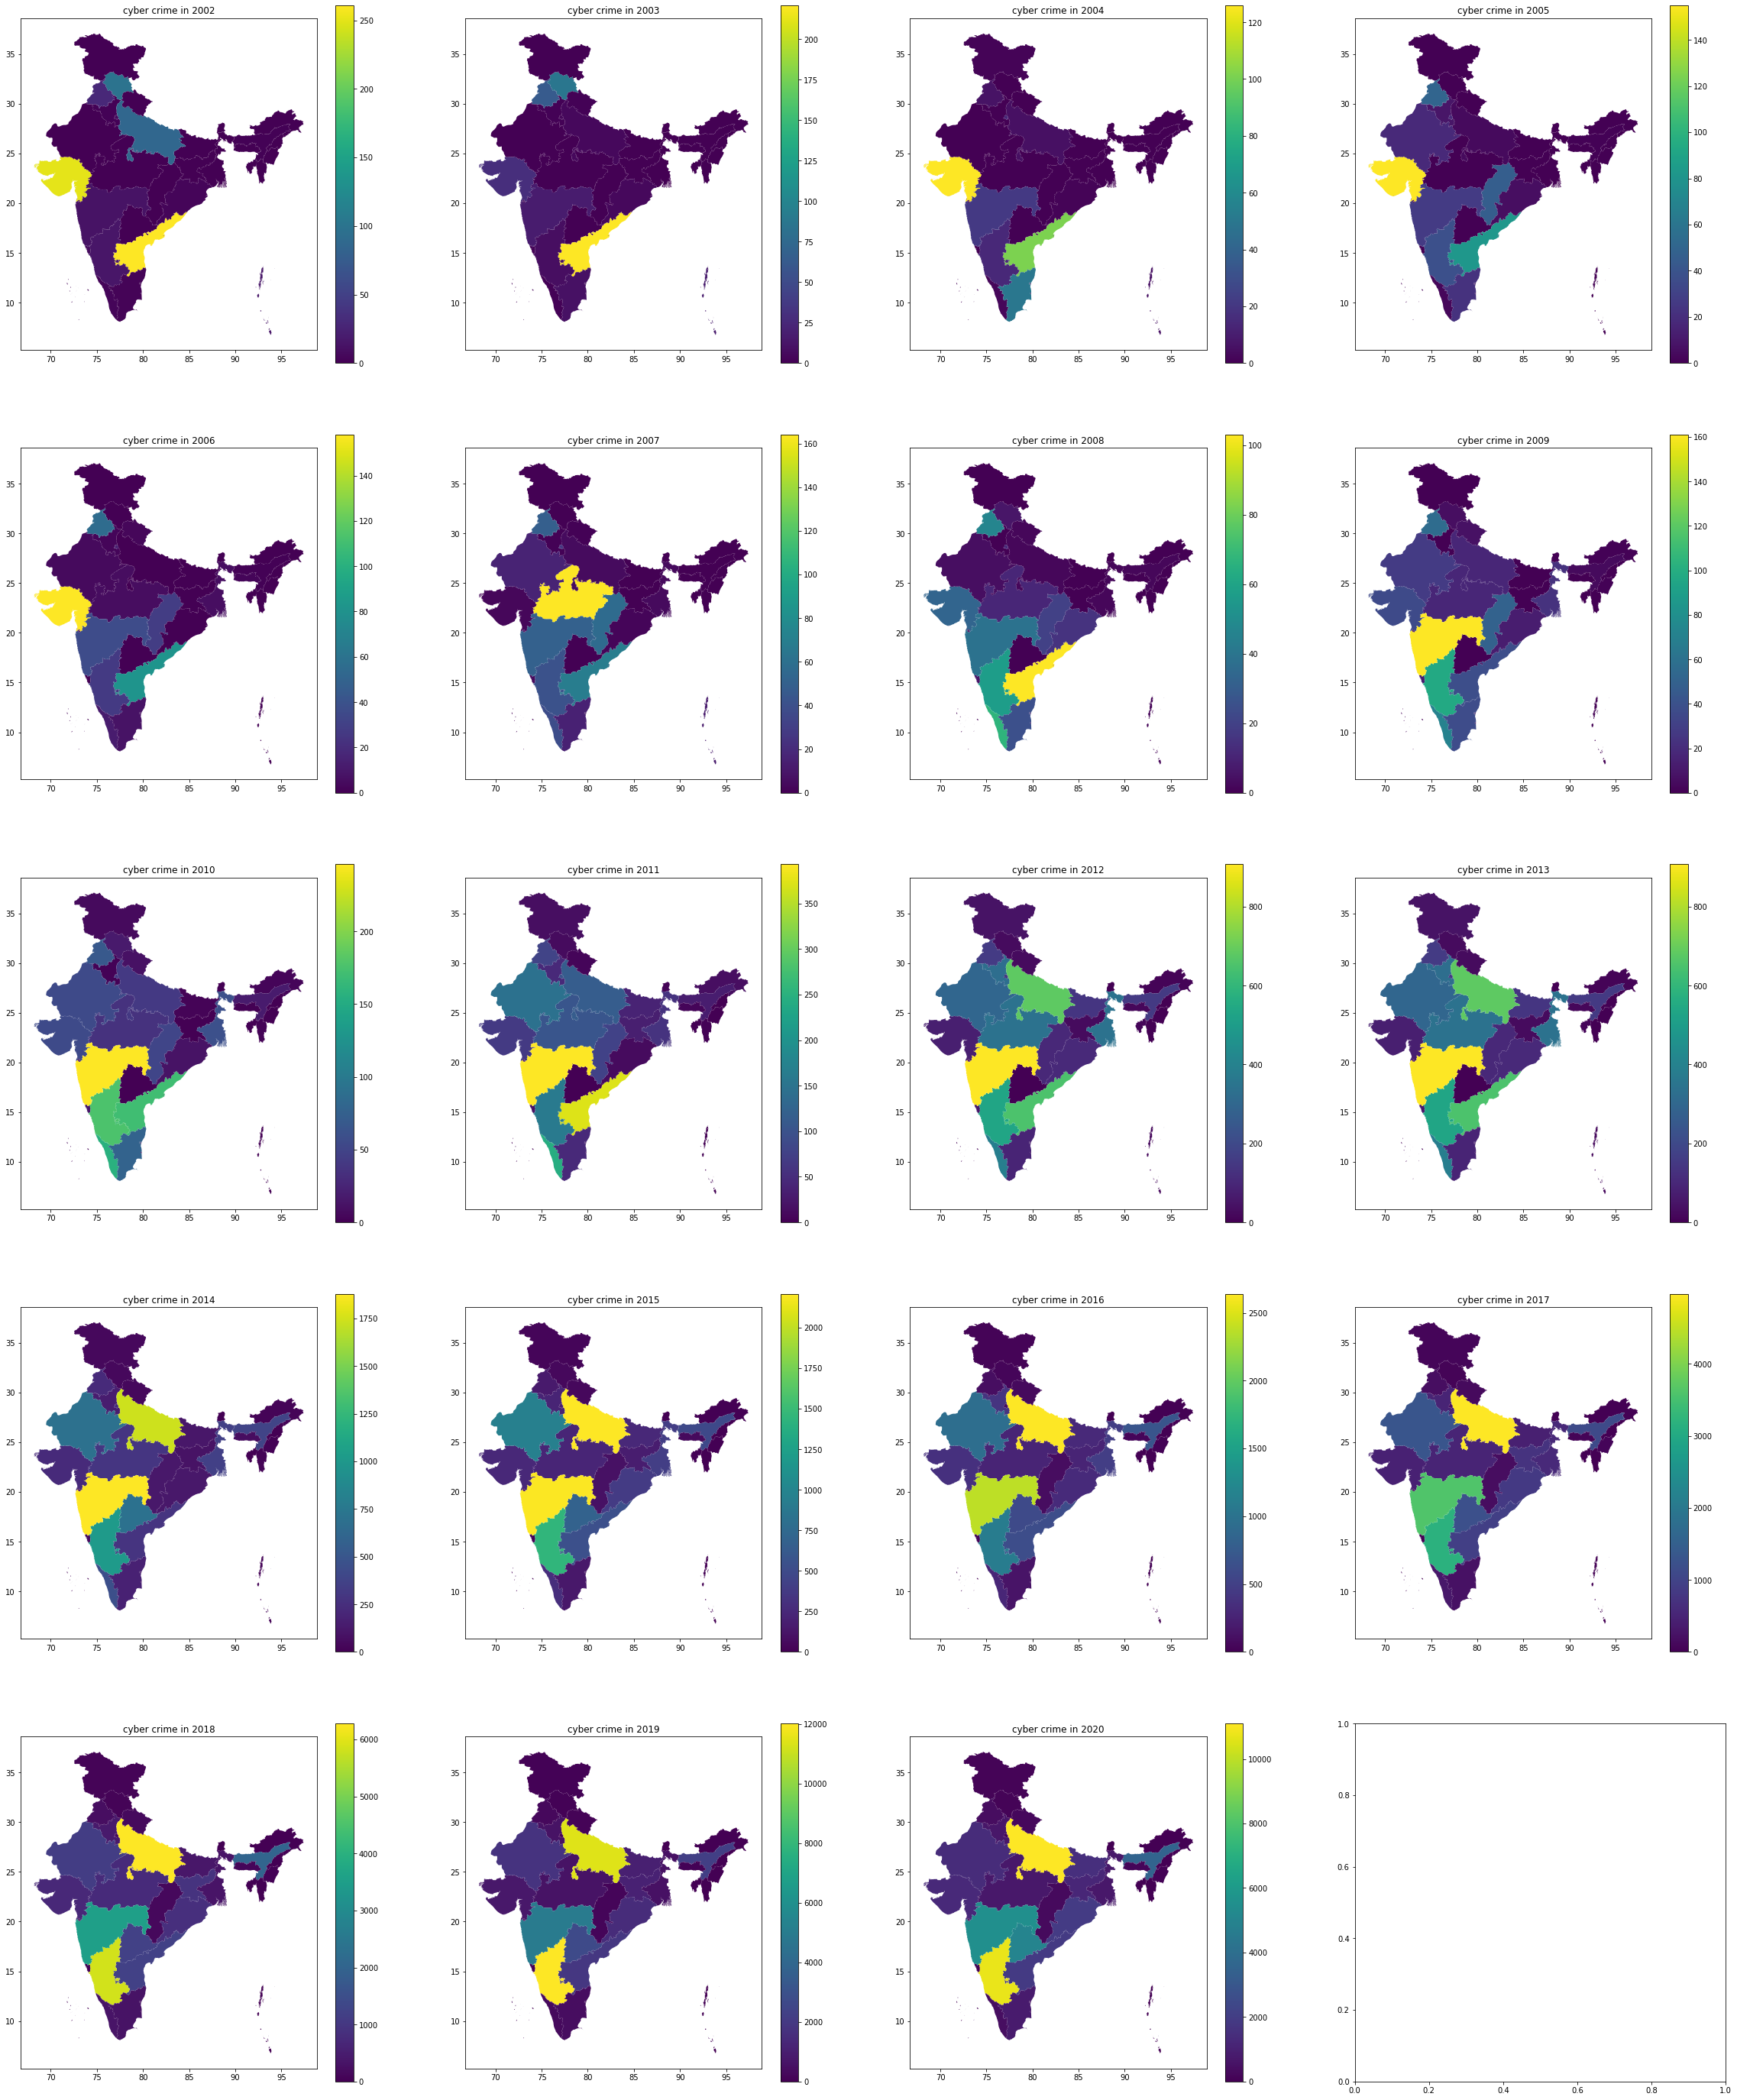

In [13]:
fig , axes = plt.subplots(5,4 , figsize=(40,50)) 
for i in range(2002,2021):
    y = (i-2002)//4
    x = (i-2002)%4
    axes[y][x].set_title("cyber crime in " + str(i))
    gdf.plot(str(i),ax=axes[y][x], legend=True)